In [2]:
# Add project root to sys.path so we can import from src/
import sys
from pathlib import Path
project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
sys.modules.pop("src.visualization", None)
sys.modules.pop("src.data_processing", None)

from src.data_processing import load_data, detect_missing_mask, compute_rate_by_header, analyze_training_hours
from src.visualization import visualize_multiple_bar_charts, visualize_target, visualize_categorical, visualize_trend, visualize_city_index, visualize_training_hours, visualize_analyze_training_hours, visualize_company_features

## 🎯 Câu hỏi EDA cho HR Analytics

### 🎯 Câu hỏi 1 --- Phân tích nhân khẩu học

#### **Những nhóm ứng viên nào có tỷ lệ muốn chuyển việc cao nhất?**

*(Xét theo giới tính, kinh nghiệm, chuyên ngành và trình độ học vấn)*

##### 🔍 Mục tiêu

Xác định nhóm ứng viên có xu hướng muốn thay đổi công việc cao nhất,
giúp doanh nghiệp hiểu rõ đâu là nhóm có nguy cơ "turnover" cao.


------------------------------------------------------------------------

### 🎯 Câu hỏi 2 --- Ảnh hưởng của đào tạo

#### **Training_hours có ảnh hưởng đến việc ứng viên quyết định đổi việc không?**

##### 🔍 Mục tiêu

Đánh giá xem liệu việc đào tạo có đóng vai trò giữ chân nhân viên hay
không.

------------------------------------------------------------------------

### 🎯 Câu hỏi 3 --- Đặc điểm công ty & turnover

#### **Các đặc điểm về công ty ảnh hưởng như thế nào đến khả năng đổi việc?**

*(company_size, company_type, relevant_experience)*

##### 🔍 Mục tiêu

Phân tích xem những yếu tố thuộc về công ty ảnh hưởng thế nào đến xu
hướng thay đổi việc làm của ứng viên.

------------------------------------------------------------------------

### 🧩 Tóm tắt 3 câu hỏi EDA

✔ **(Q1)** Nhóm ứng viên nào có tỷ lệ muốn chuyển việc cao nhất?\
✔ **(Q2)** Training_hours có ảnh hưởng đến quyết định đổi việc không?\
✔ **(Q3)** Đặc điểm công ty tác động thế nào đến khả năng đổi việc?


In [3]:
header, data = load_data('../data/raw/aug_train.csv')
print(f"- Features: {header}")
print(f"- Rows: {data.shape[0]}\n- Columns: {data.shape[1]}")

- Features: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
- Rows: 19158
- Columns: 14


In [4]:
print("First 5 rows of data:\n")
print(data[:5])

First 5 rows of data:

[['8949' 'city_103' '0.92' 'Male' 'Has relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '>20' '' '' '1' '36' '1.0']
 ['29725' 'city_40' '0.7759999999999999' 'Male' 'No relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '15' '50-99' 'Pvt Ltd' '>4' '47'
  '0.0']
 ['11561' 'city_21' '0.624' '' 'No relevent experience'
  'Full time course' 'Graduate' 'STEM' '5' '' '' 'never' '83' '0.0']
 ['33241' 'city_115' '0.789' '' 'No relevent experience' '' 'Graduate'
  'Business Degree' '<1' '' 'Pvt Ltd' 'never' '52' '1.0']
 ['666' 'city_162' '0.767' 'Male' 'Has relevent experience'
  'no_enrollment' 'Masters' 'STEM' '>20' '50-99' 'Funded Startup' '4' '8'
  '0.0']]


In [5]:
mask = detect_missing_mask(data)
missing_counts = mask.sum(axis=0)

print("Missing value:")
for h, c in zip(header, missing_counts):
    print(f" - {h}: {c}")

Missing value:
 - enrollee_id: 0
 - city: 0
 - city_development_index: 0
 - gender: 4508
 - relevent_experience: 0
 - enrolled_university: 386
 - education_level: 460
 - major_discipline: 2813
 - experience: 65
 - company_size: 5938
 - company_type: 6140
 - last_new_job: 423
 - training_hours: 0
 - target: 0



--- Phân tích Target Imbalance ---

Tổng mẫu: 19158
Số người muốn thay đổi (Target = 1): 4777 (24.93%)


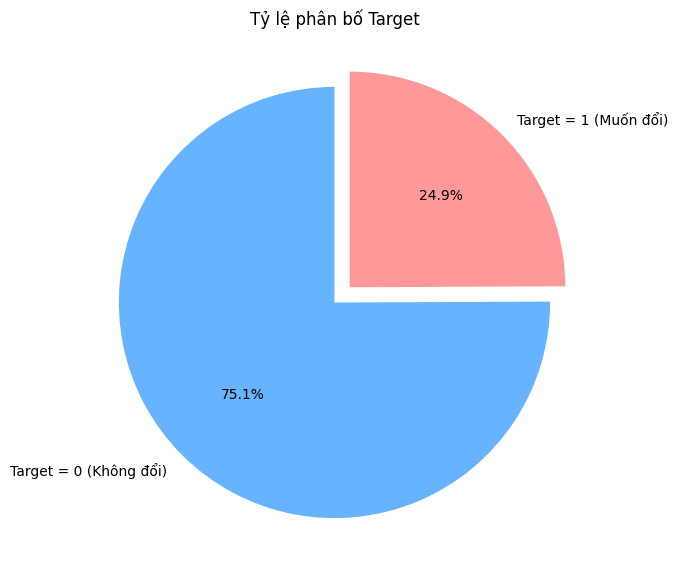

In [6]:
visualize_target(data, header)


--- Phân tích tỷ lệ thay đổi công việc theo Đặc trưng ---


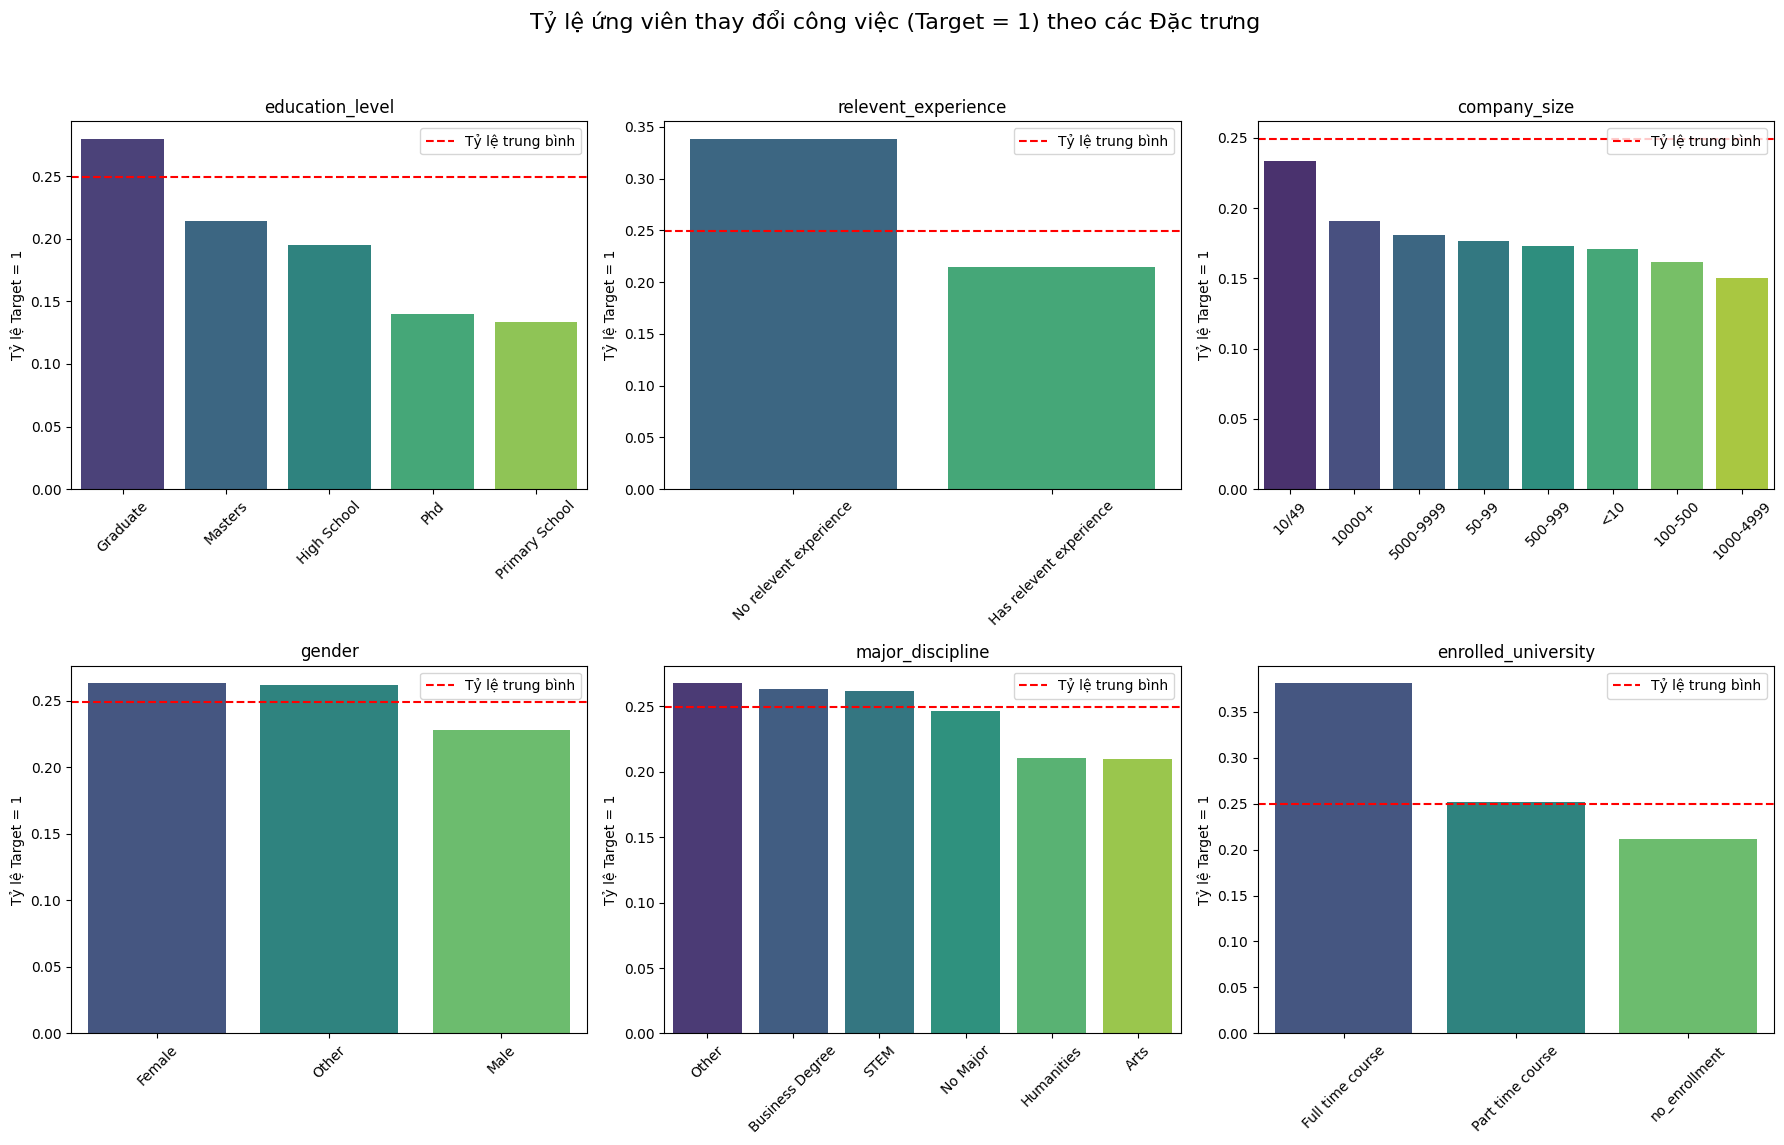

In [7]:
categorical_cols = ['education_level', 'relevent_experience', 'company_size', 'gender', 'major_discipline', 'enrolled_university']

visualize_categorical(data, header, categorical_cols)


--- Phân tích xu hướng theo kinh nghiệm ---


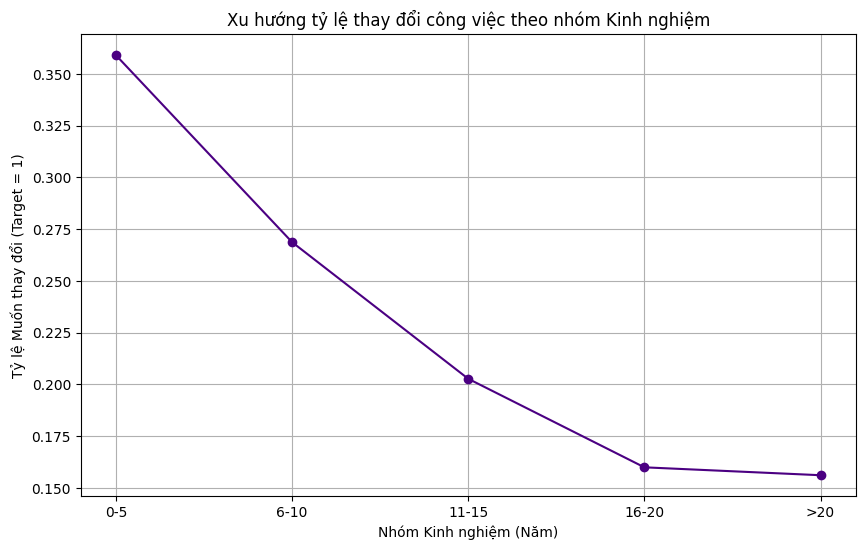

In [8]:
trend = 'experience'

print("\n--- Phân tích xu hướng theo kinh nghiệm ---")
visualize_trend(data, header, trend)


--- Phân tích City Development Index ---
Median Target = 0: 0.9100
Median Target = 1: 0.7400


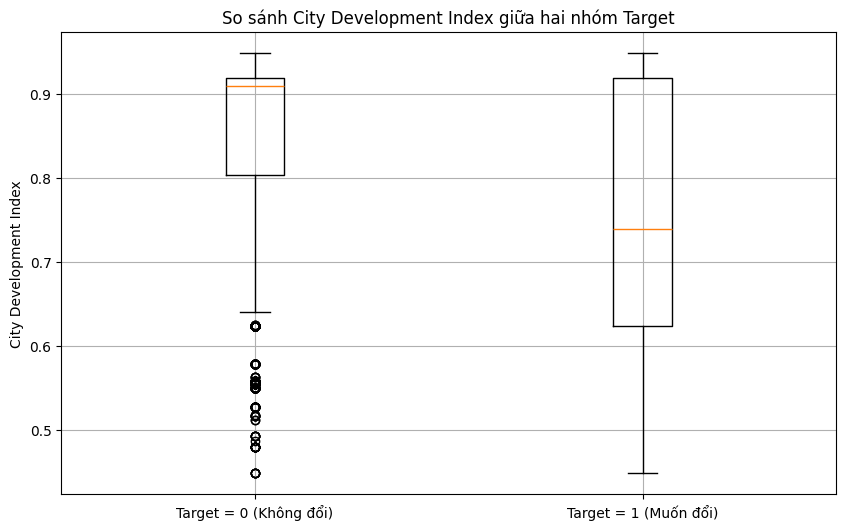

In [9]:
visualize_city_index(data, header)

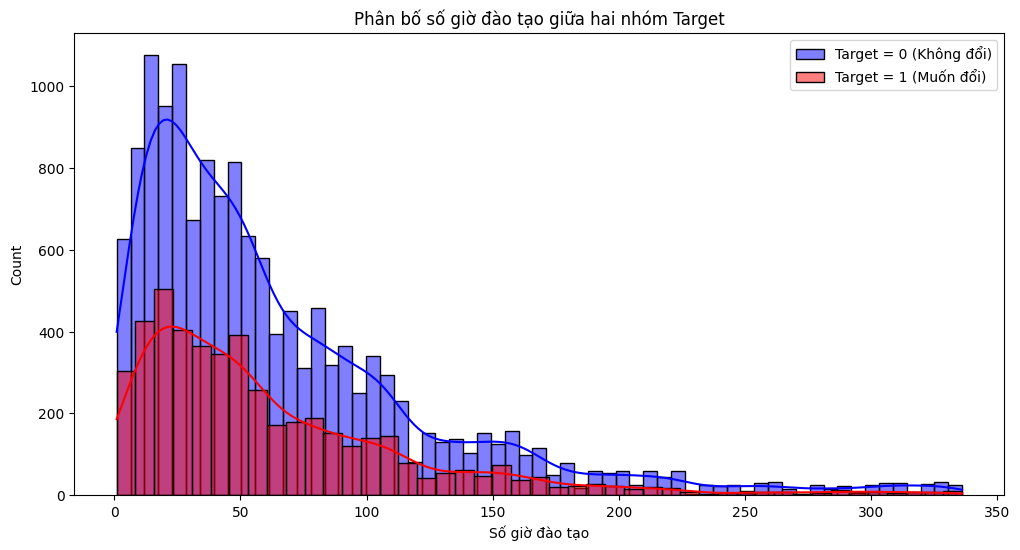

In [10]:
visualize_training_hours(data, header)

### 🎯 Câu hỏi 1 --- Phân tích nhân khẩu học

#### **Những nhóm ứng viên nào có tỷ lệ muốn chuyển việc cao nhất?**

*(Xét theo giới tính, kinh nghiệm, chuyên ngành và trình độ học vấn)*

##### 🔍 Mục tiêu

Xác định nhóm ứng viên có xu hướng muốn thay đổi công việc cao nhất,
giúp doanh nghiệp hiểu rõ đâu là nhóm có nguy cơ "turnover" cao.

In [11]:
gender_cate, gender_rates = compute_rate_by_header(data, header, 'gender')

print("Tỉ lệ chuyển việc theo giới tính:")
for v, r in zip(gender_cate, gender_rates):
	print(f" - {v}: {r:.2%}")

Tỉ lệ chuyển việc theo giới tính:
 - Female: 26.33%
 - Male: 22.78%
 - Other: 26.18%


In [12]:
exp, exp_rates = compute_rate_by_header(data, header, 'experience')

print("Tỉ lệ chuyển việc theo kinh nghiệm:")
for v, r in zip(exp, exp_rates):
	print(f" - {v} năm: {r:.2%}")

Tỉ lệ chuyển việc theo kinh nghiệm:
 - 1 năm: 42.44%
 - 10 năm: 21.02%
 - 11 năm: 22.74%
 - 12 năm: 18.62%
 - 13 năm: 19.30%
 - 14 năm: 18.26%
 - 15 năm: 16.62%
 - 16 năm: 14.17%
 - 17 năm: 16.67%
 - 18 năm: 15.36%
 - 19 năm: 17.43%
 - 2 năm: 33.19%
 - 20 năm: 22.30%
 - 3 năm: 35.30%
 - 4 năm: 32.57%
 - 5 năm: 28.81%
 - 6 năm: 28.21%
 - 7 năm: 29.47%
 - 8 năm: 24.31%
 - 9 năm: 21.73%
 - <1 năm: 45.40%
 - >20 năm: 15.31%


In [13]:
major, major_rates = compute_rate_by_header(data, header, 'major_discipline')

print("Tỉ lệ chuyển việc theo chuyên ngành:")
for v, r in zip(major, major_rates):
	print(f" - {v}: {r:.2%}")

Tỉ lệ chuyển việc theo chuyên ngành:
 - Arts: 20.95%
 - Business Degree: 26.30%
 - Humanities: 21.08%
 - No Major: 24.66%
 - Other: 26.77%
 - STEM: 26.16%


In [14]:
education, education_rates = compute_rate_by_header(data, header, 'education_level')

print("Tỉ lệ chuyển việc theo trình độ học vấn:")
for v, r in zip(education, education_rates):	
	print(f" - {v}: {r:.2%}")

Tỉ lệ chuyển việc theo trình độ học vấn:
 - Graduate: 27.98%
 - High School: 19.53%
 - Masters: 21.44%
 - Phd: 14.01%
 - Primary School: 13.31%


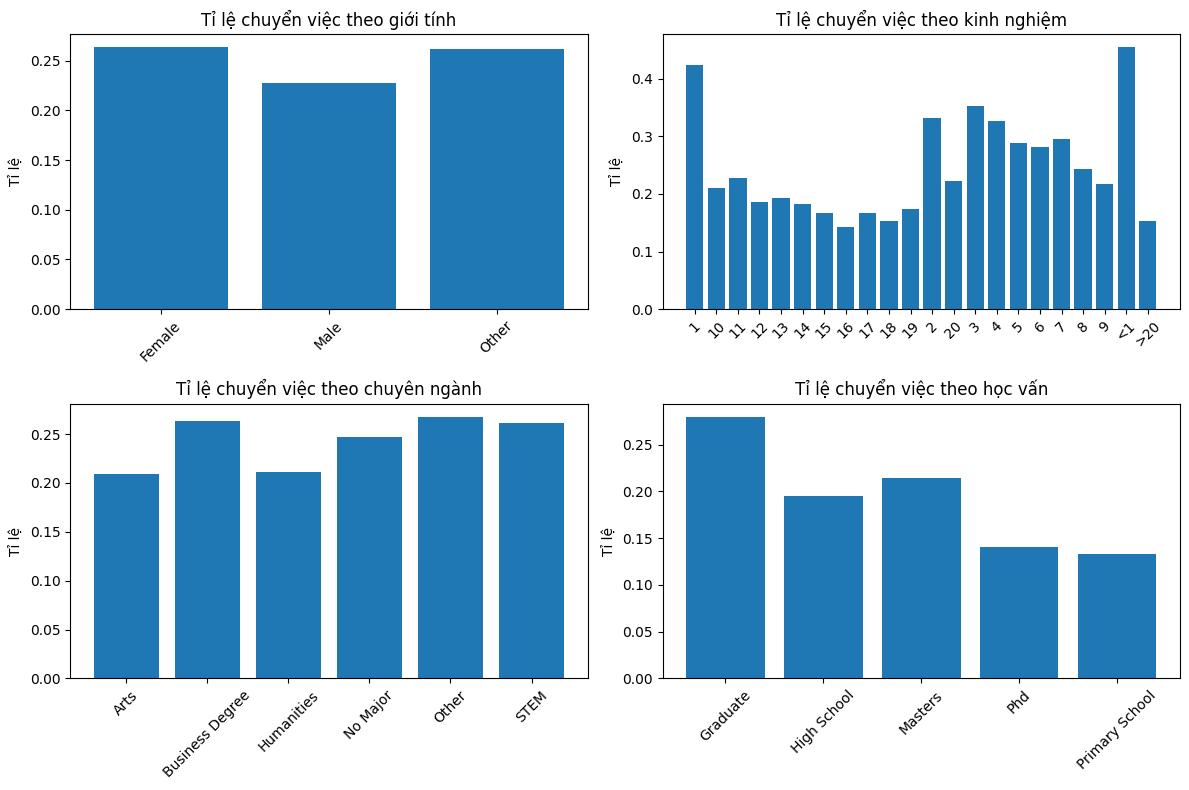

In [15]:
charts = [
    (gender_cate, gender_rates, "Tỉ lệ chuyển việc theo giới tính", "Tỉ lệ"),
    (exp, exp_rates, "Tỉ lệ chuyển việc theo kinh nghiệm", "Tỉ lệ"),
	(major, major_rates, "Tỉ lệ chuyển việc theo chuyên ngành", "Tỉ lệ"),
    (education, education_rates, "Tỉ lệ chuyển việc theo học vấn", "Tỉ lệ")
]

visualize_multiple_bar_charts(charts, rows=2, cols=2)

### Phân tích nhân khẩu học về xu hướng chuyển việc của ứng viên

#### 1. Giới tính

**Insight:** Giới tính không phải yếu tố ảnh hưởng đáng kể đến xu hướng chuyển việc, các nhóm có tỷ lệ khá tương đồng.

---

#### 2. Kinh nghiệm

**Insight:** Những ứng viên ít kinh nghiệm (<3 năm) có xu hướng nhảy việc cao hơn, trong khi nhân sự kỳ cựu (>20 năm) có tỷ lệ thấp hơn.

---

#### 3. Chuyên ngành

**Insight:** Các chuyên ngành Business, STEM và Other (có thể liên quan đến Công nghệ thông tin) có xu hướng chuyển việc cao hơn so với Arts hoặc Humanities.

---

#### 4. Trình độ học vấn

**Insight:** Nhóm ứng viên có trình độ phổ biến (Graduate, High School, Masters) có tỷ lệ muốn chuyển việc cao hơn, trong khi nhóm quá thấp (Primary School) hoặc quá cao (PhD) có xu hướng ổn định hơn.

---

#### Tóm tắt
- **Kinh nghiệm** và **trình độ học vấn** là các yếu tố chính ảnh hưởng đến xu hướng chuyển việc.  
- **Chuyên ngành** cũng có tác động: các ngành Business, STEM, Other (có thể liên quan đến Công nghệ Thông tin) có tỷ lệ chuyển việc cao hơn.  
- **Giới tính** không ảnh hưởng nhiều.


### 🎯 Câu hỏi 2 --- Ảnh hưởng của đào tạo

#### **Training_hours có ảnh hưởng đến việc ứng viên quyết định đổi việc không?**

##### 🔍 Mục tiêu

Đánh giá xem liệu việc đào tạo có đóng vai trò giữ chân nhân viên hay
không.

Tỉ lệ chuyển việc theo nhóm giờ đào tạo:
 - 0-50 giờ: 25.42%
 - 51-100 giờ: 24.87%
 - 101-200 giờ: 24.78%
 - >200 giờ: 20.12%


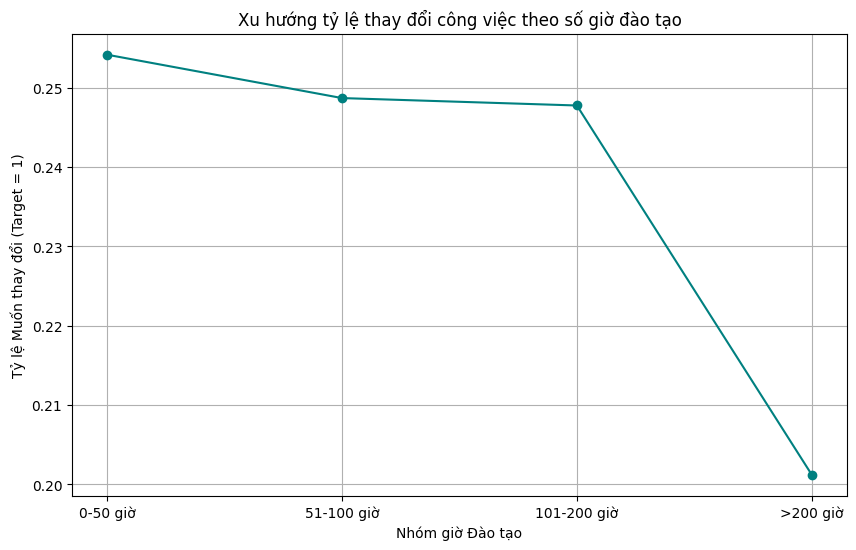

In [16]:
bin_labels, binned_rates = analyze_training_hours(data, header)
print("Tỉ lệ chuyển việc theo nhóm giờ đào tạo:")
for v, r in zip(bin_labels, binned_rates):
	print(f" - {v}: {r:.2%}")
visualize_analyze_training_hours(bin_labels, binned_rates)

**Insight:**  
Có một xu hướng rõ ràng: **những ứng viên được đào tạo nhiều hơn (>200 giờ) có tỷ lệ muốn chuyển việc thấp hơn** so với những người nhận ít đào tạo (<200 giờ). Điều này gợi ý rằng việc đào tạo có thể **giúp giữ chân nhân viên**, mặc dù sự khác biệt không quá lớn giữa các nhóm 0-200 giờ.

### 🎯 Câu hỏi 3 --- Đặc điểm công ty & turnover

#### **Các đặc điểm về công ty ảnh hưởng như thế nào đến khả năng đổi việc?**

*(company_size, company_type, relevant_experience)*

##### 🔍 Mục tiêu

Phân tích xem những yếu tố thuộc về công ty ảnh hưởng thế nào đến xu
hướng thay đổi việc làm của ứng viên.

In [17]:
company_size, company_size_rates  = compute_rate_by_header(data, header, 'company_size')

print("Tỉ lệ chuyển việc theo kích thước công ty:")
for v, r in zip(company_size, company_size_rates):	
	print(f" - {v}: {r:.2%}")


Tỉ lệ chuyển việc theo kích thước công ty:
 - 10/49: 23.39%
 - 100-500: 16.14%
 - 1000-4999: 15.06%
 - 10000+: 19.07%
 - 50-99: 17.68%
 - 500-999: 17.33%
 - 5000-9999: 18.12%
 - <10: 17.13%


In [18]:
company_type, company_type_rates  = compute_rate_by_header(data, header, 'company_type')

print("Tỉ lệ chuyển việc theo loại công ty:")
for v, r in zip(company_type, company_type_rates):	
	print(f" - {v}: {r:.2%}")

Tỉ lệ chuyển việc theo loại công ty:
 - Early Stage Startup: 23.55%
 - Funded Startup: 13.99%
 - NGO: 18.62%
 - Other: 23.97%
 - Public Sector: 21.99%
 - Pvt Ltd: 18.08%


In [19]:
relevent_experience, relevent_experience_rates  = compute_rate_by_header(data, header, 'relevent_experience')

print("Tỉ lệ chuyển việc theo kinh nghiệm liên quan:")
for v, r in zip(relevent_experience, relevent_experience_rates):	
	print(f" - {v}: {r:.2%}")

Tỉ lệ chuyển việc theo kinh nghiệm liên quan:
 - Has relevent experience: 21.47%
 - No relevent experience: 33.84%



--- Phân tích Đặc điểm Công ty & Turnover ---


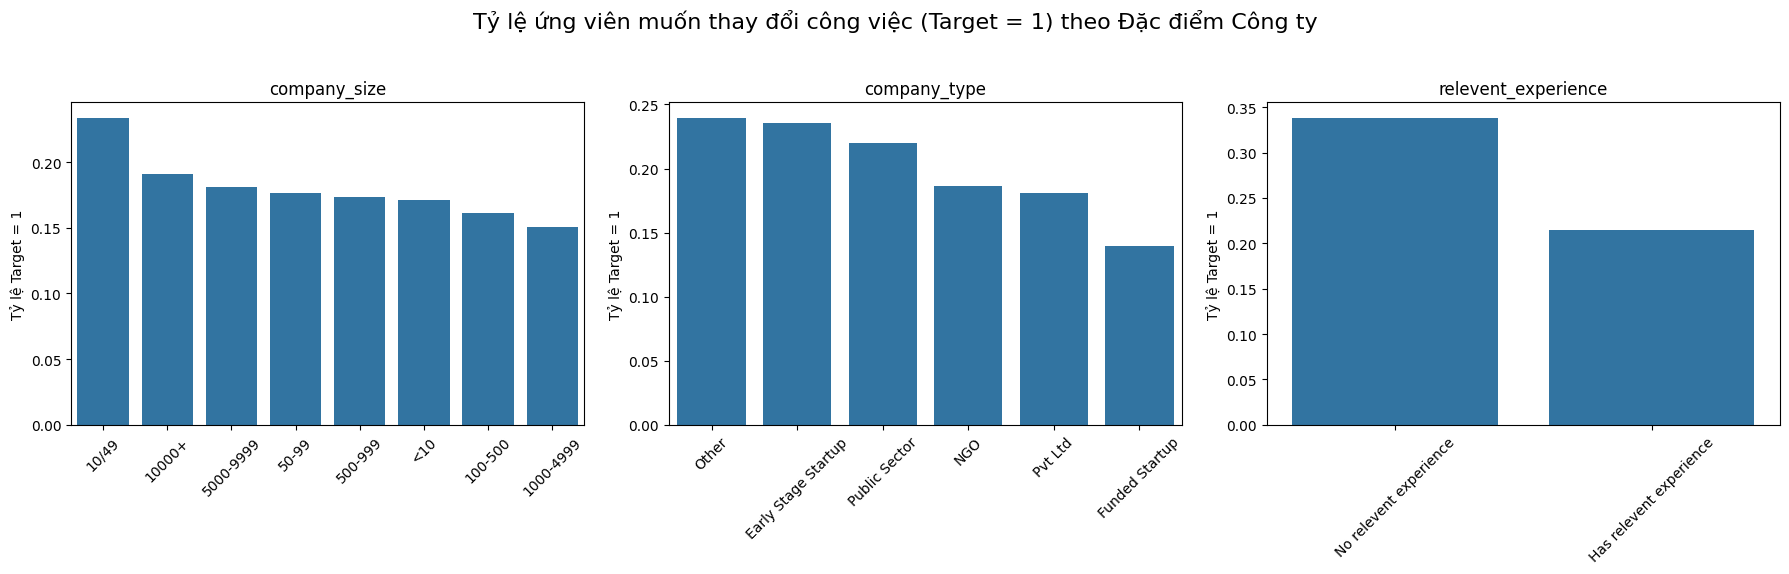

In [20]:
visualize_company_features(data, header, compute_rate_by_header)

**Insight:**

- **Kích thước công ty:** Ứng viên ở các công ty rất nhỏ (10–49) có tỷ lệ muốn chuyển việc cao nhất. Trong khi đó, các công ty từ 100–500 và 1000–4999 có tỷ lệ thấp nhất, cho thấy môi trường ổn định hơn → càng lớn và có cấu trúc rõ ràng, turnover càng thấp.

- **Loại công ty:** Nhóm *Early Stage Startup* và *Other* có xu hướng nhảy việc nhiều hơn, trong khi *Funded Startup* có tỷ lệ thấp nhất. Điều này thể hiện sự ổn định tài chính đóng vai trò quan trọng trong việc giữ chân nhân viên.

- **Kinh nghiệm liên quan:** Ứng viên **không có kinh nghiệm liên quan** có tỷ lệ muốn đổi việc cao hơn rất nhiều so với nhóm có kinh nghiệm phù hợp. Đây là yếu tố ảnh hưởng mạnh nhất trong ba nhóm, cho thấy thiếu phù hợp chuyên môn dễ dẫn đến turnover.

**Tóm lại:** Các yếu tố thuộc về công ty như **quy mô nhỏ**, **loại hình kém ổn định**, và **thiếu kinh nghiệm liên quan** đều làm tăng khả năng ứng viên muốn chuyển việc.
